In [ ]:
import os, sys

In [1]:
dir = os.path.dirname
path = dir(os.getcwd())
print(path)
sys.path.append(path)

d:\COSAS\BOOTCAMP\MLProyect


In [2]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
import cv2
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
import numpy as np
import os, sys
import PIL
import PIL.Image

'''
dir = os.path.dirname
path = dir(dir(dir(os.path.abspath(__file__))))
print(path)
sys.path.append(path)

def img():
'''
batch_size = 32 # Entrena de 32 en 32
img_height = 64
img_width = 64

train_dir = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "Training"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
validation_split=0.2,
subset="training", 
seed=153,
image_size=(img_height, img_width),
batch_size=batch_size
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
validation_split=0.2,
subset="validation", 
seed=153,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [3]:
test_dir = os.path.dirname(os.getcwd()) + os.sep + "data" + os.sep + "Testing"
test_data = tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
seed = 153,
image_size = (img_height,img_width),
batch_size =batch_size)

Found 394 files belonging to 4 classes.


In [4]:
print(train_data.class_names)
print(val_data.class_names)
print(test_data.class_names)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


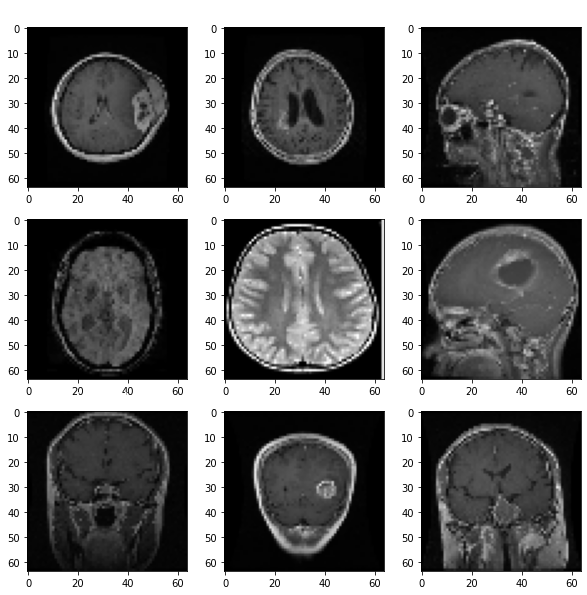

In [5]:
classes = train_data.class_names
plt.figure(figsize = (10,10))
for img,label in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(classes[label[i]],
                  fontdict = {'fontsize': '19',
                              'color': 'white'}
                 )

In [7]:
train_data

<BatchDataset shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int32)>

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        input_shape=(32, 32, 3),
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3),
            padding='valid',
            activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='sigmoid'))
model.add(layers.Dense(10 , activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                

In [18]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_data, epochs =10, validation_data=val_data, callbacks=early_stop)

Epoch 1/10
72/72 [==============================] - 27s 345ms/step - loss: 3.6787 - accuracy: 0.5248 - val_loss: 0.8856 - val_accuracy: 0.6010
Epoch 2/10
72/72 [==============================] - 23s 318ms/step - loss: 0.7725 - accuracy: 0.6947 - val_loss: 0.7646 - val_accuracy: 0.6707
Epoch 3/10
72/72 [==============================] - 22s 298ms/step - loss: 0.6002 - accuracy: 0.7600 - val_loss: 0.8129 - val_accuracy: 0.6707
Epoch 4/10
72/72 [==============================] - 22s 304ms/step - loss: 0.5146 - accuracy: 0.7992 - val_loss: 0.7812 - val_accuracy: 0.7282
Epoch 5/10
72/72 [==============================] - 22s 302ms/step - loss: 0.5384 - accuracy: 0.7940 - val_loss: 0.7464 - val_accuracy: 0.7404
Epoch 6/10
72/72 [==============================] - 22s 305ms/step - loss: 0.3836 - accuracy: 0.8641 - val_loss: 0.7352 - val_accuracy: 0.7456
Epoch 7/10
72/72 [==============================] - 22s 309ms/step - loss: 0.2676 - accuracy: 0.9020 - val_loss: 0.5955 - val_accuracy: 0.7892

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.evaluate(test_data)


13/13 [==============================] - 2s 89ms/step - loss: 3.2192 - accuracy: 0.5863


In [ ]:
model.save('../models/model1.h5')